# Challenge: Compare data from lidar and a nearby buoy

In today's challenge, your goal is to compare the lidar wind speed data (what we looked at this morning) to a new dataset from a nearby meteorological buoy.

The lidar is located at 39.9695, -72.160. We can grab measurements from a meteorological buoy, courtesy of [NOAA National Data Buoy Center](https://www.ndbc.noaa.gov/). [Buoy 44025](https://www.ndbc.noaa.gov/station_history.php?station=44025) is at 40.251, -73.164.

Your objectives are to:
1. Read in and proccess the lidar data.
2. Read in and process the buoy data.
3. Plot the processed data.
4. Compare the two datasets.

## 1. Read in and process the lidar data

In this step, repeat most of what you did this morning to read in the `lidar_winds.csv` file and prepare it for plotting.

<font color='blue'>Begin by importing the libraries that you'll be using. You'll need the same four that you used this morning: `datetime`, `numpy`, `pandas`, and `matplotlib.pyplot`. You can just copy and paste this step from the notebook we used earlier if you'd like.</font>

In [1]:
### Import libraries
from datetime import datetime  # for some datetime manipulations
import numpy as np # for data storage and math
import pandas as pd # for data storage and timeseries math
import matplotlib.pyplot as plt # for plotting

<font color='blue'>Read in the tabular data using `pandas`. Since you'll have two datasets, rather than calling the dataframe `df` like we did before, name it `df_lidar` so we can distinguish between the two datasets.</font>

In [9]:
### Read tabluar data into a pandas DataFrame
df_lidar = pd.read_csv("lidar_winds.csv")

In [10]:
df_lidar

,timestamp,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
0,08-12-2019 00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
1,08-12-2019 00:10,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2,08-12-2019 00:20,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
3,08-12-2019 00:30,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
4,08-12-2019 00:40,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296
...,...,...,...,...,...,...,...,...,...,...,...
84391,03-21-2021 23:10,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546
84392,03-21-2021 23:20,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571
84393,03-21-2021 23:30,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883
84394,03-21-2021 23:40,2.7582,2.9039,3.1269,3.4249,3.5028,3.1862,2.9139,2.7500,2.6825,2.6642


We've already looked at this dataset and we know what it looks like, so we can move right into setting the timestamps.

<font color='blue'>Use `datetime` to convert the data in the `timestamp` column from an `object` format to a `datetime64` format.</font>

In [11]:
df_lidar['timestamp'] = pd.to_datetime(df_lidar['timestamp'])

In [13]:
df_lidar.index

RangeIndex(start=0, stop=84396, step=1)

In [14]:
df_lidar

,timestamp,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
0,2019-08-12 00:00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
1,2019-08-12 00:10:00,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2,2019-08-12 00:20:00,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
3,2019-08-12 00:30:00,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
4,2019-08-12 00:40:00,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296
...,...,...,...,...,...,...,...,...,...,...,...
84391,2021-03-21 23:10:00,1.7978,1.9557,2.0617,1.9270,1.3744,1.0722,0.9203,0.9038,0.9421,1.2546
84392,2021-03-21 23:20:00,2.6771,2.8746,2.8993,2.9530,2.9098,2.6337,2.1869,1.7314,1.5436,1.6571
84393,2021-03-21 23:30:00,3.2416,3.4077,3.5611,3.5823,3.5930,3.3885,2.9375,2.4509,2.2373,2.2883
84394,2021-03-21 23:40:00,2.7582,2.9039,3.1269,3.4249,3.5028,3.1862,2.9139,2.7500,2.6825,2.6642


<font color='blue'>Next, set the dataframe index as `timestamp`.</font>

In [15]:
df_lidar = df_lidar.set_index('timestamp')

<font color='blue'>Finally, type the name of the dataframe (`df_lidar`) to view the final product.</font>

In [16]:
df_lidar.index

DatetimeIndex(['2019-08-12 00:00:00', '2019-08-12 00:10:00',
               '2019-08-12 00:20:00', '2019-08-12 00:30:00',
               '2019-08-12 00:40:00', '2019-08-12 00:50:00',
               '2019-08-12 01:00:00', '2019-08-12 01:10:00',
               '2019-08-12 01:20:00', '2019-08-12 01:30:00',
               ...
               '2021-03-21 22:20:00', '2021-03-21 22:30:00',
               '2021-03-21 22:40:00', '2021-03-21 22:50:00',
               '2021-03-21 23:00:00', '2021-03-21 23:10:00',
               '2021-03-21 23:20:00', '2021-03-21 23:30:00',
               '2021-03-21 23:40:00', '2021-03-21 23:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=84396, freq=None)

## 2. Read in and process the buoy data

Now that you've had more practice reading in data, go ahead and read in and prepare the data from the meteorological data.

The file is called `buoy_data.csv`, and it's the same file type as the lidar dataset. Therefore, you'll want to use `pandas` to process and analyze the data, just like you did earlier.

We've given you the column names and units to help out a bit:

Column units:
* WDIR: degT
* WSPD: m/s
* GST: m/s
* WHVT: m
* DPD: sec
* APD: sec
* MWD: degT
* PRES: hPa
* ATMP: degC
* WTMP: degC
* DEWP: degC
* VIS: mi
* TIDE: ft

<font color='blue'>Start by reading in the tabular data with `pandas`. Name the dataframe `df_buoy` so you don't get it confused with the lidar dataframe.</font>

In [17]:
df_buoy = pd.read_csv("buoy_data.csv")

<font color='blue'>Just like we did this morning, use the `.head()` command to view the first 5 lines of the dataframe.</font>

In [18]:
df_buoy.head(5)

,time,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,2019-01-01 00:50:00,135,11.3,14.1,1.56,5.56,4.71,153,1018.4,8.1,7.1,999.0,99.0,99.0
1,2019-01-01 01:50:00,127,11.2,14.0,1.92,5.88,5.09,135,1016.6,8.3,7.1,999.0,99.0,99.0
2,2019-01-01 02:50:00,137,12.7,15.3,2.23,6.25,5.22,143,1013.6,8.7,7.2,999.0,99.0,99.0
3,2019-01-01 03:50:00,150,13.7,16.9,2.52,6.67,5.49,148,1010.7,9.5,7.2,999.0,99.0,99.0
4,2019-01-01 04:50:00,168,9.5,11.2,2.77,7.14,5.75,141,1010.0,10.2,7.2,999.0,99.0,99.0


This dataset has much more than just wind speed, which is the only type of measurement from the lidar. For now, let's just focus on the wind speed, which is abbreviated `WSPD` and is in units of meters per second (m/s).

Let's check out the timestamp column to see what the current data type is.

<font color='blue'>View the time column using the same method we used this morning.</font>

In [19]:
df_buoy['time']

0        2019-01-01 00:50:00
1        2019-01-01 01:50:00
2        2019-01-01 02:50:00
3        2019-01-01 03:50:00
4        2019-01-01 04:50:00
                ...         
45824    2020-12-31 23:10:00
45825    2020-12-31 23:20:00
45826    2020-12-31 23:30:00
45827    2020-12-31 23:40:00
45828    2020-12-31 23:50:00
Name: time, Length: 45829, dtype: object

You should notice now that the data type ("dtype") is `object`. 

<font color='blue'>Use the same methods that we used this morning and in Step 1 to turn the timestamp into a `datetime64` format.</font>

In [21]:
df_buoy['time'] = pd.to_datetime(df_buoy['time'])

<font color='blue'>Now set the index as the newly formatted timestamps.</font>

In [22]:
df_buoy = df_buoy.set_index('time')

<font color='blue'>Finally, type the name of the dataframe (`df_buoy`) to view the final product.</font>

In [23]:
df_buoy

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
time,,,,,,,,,,,,,
2019-01-01 00:50:00,135,11.3,14.1,1.56,5.56,4.71,153,1018.4,8.1,7.1,999.0,99.0,99.0
2019-01-01 01:50:00,127,11.2,14.0,1.92,5.88,5.09,135,1016.6,8.3,7.1,999.0,99.0,99.0
2019-01-01 02:50:00,137,12.7,15.3,2.23,6.25,5.22,143,1013.6,8.7,7.2,999.0,99.0,99.0
2019-01-01 03:50:00,150,13.7,16.9,2.52,6.67,5.49,148,1010.7,9.5,7.2,999.0,99.0,99.0
2019-01-01 04:50:00,168,9.5,11.2,2.77,7.14,5.75,141,1010.0,10.2,7.2,999.0,99.0,99.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:10:00,323,7.7,9.8,99.00,99.00,99.00,999,1024.0,999.0,9.0,999.0,99.0,99.0
2020-12-31 23:20:00,328,8.0,10.1,99.00,99.00,99.00,999,1024.2,999.0,9.0,999.0,99.0,99.0
2020-12-31 23:30:00,328,8.1,11.0,99.00,99.00,99.00,999,1024.1,999.0,9.0,999.0,99.0,99.0


We checked out plots of the lidar data this morning, but we haven't taken a look at the buoy data yet. Let's go ahead and plot the buoy data to see what it looks like.

<font color='blue'>In line 3, plot the buoy wind speed as a function of the index (which we already set as the time stamp).</font>

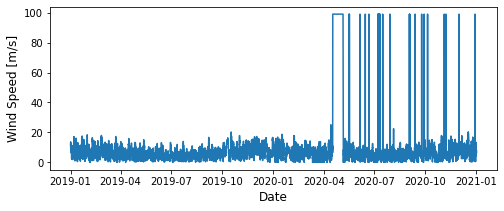

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df_buoy.index, df_buoy['WSPD'])

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

Woah! What's going on with those really high values? Wind speeds of around 100 m/s (which is over 200 mph) seem a little high... Sometimes datasets use numbers like 99, 999, or -999 to denote missing or corrupt data. Sometimes it means that the instrument collecting the data malfunctioned or there was some issue with the measurements. Regardless, those readings make it difficult to view the more real record, which has wind speeds from 0 to about 20 m/s. Let's check to see what those values are by printing the maximum wind speed value.

<text color='blue'>Type out `max(df_buoy['WSPD'])` to print the maximum value for that column.</text>

In [25]:
max(df_buoy['WSPD'])

99.0

It looks like we'll need to change every value of 99 to something that `pandas` will ignore. This is important not only for plotting, but also for any statistics we use. Imagine how much higher the mean would be if we included a bunch of 99's in our calculation!

There are many ways we could handle these data points, but in this example, we'll simply replace "99" wtih "NaN", which stands for "not a number." NaN's are ignored when you plot or calculate statistics (though sometimes you have to specifically tell the function to ignore them).

To replace "99" with "NaN", type and run the following line: `df_buoy = df_buoy.replace(99, np.nan)`

In [26]:
df_buoy = df_buoy.replace(99, np.nan)

<font color='blue'>Plot the data again to see if that worked. You can copy and paste the code we used above to plot.</font>

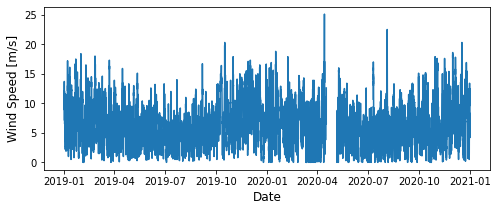

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df_buoy.index, df_buoy['WSPD'])

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

Success! Now instead of high values, you'll notice that there are gaps of missing data. Sometimes we'll fill those gaps in by interpolating across missing values, but for now we'll just keep those values as NaN's.

## 3. Plot the data

We have now successfully prepared our two datasets to plot and compare. The buoy wind speeds are only measured at a single altitude, while the lidar wind speeds are measured at a range of heights. Let's start by plotting the buoy wind speed and the lidar wind speed at the lowest altitude (18 m). 

<font color='blue'>In line 3, plot the lidar wind speed at 18 m, which is the column labeled `wspd18m` in the lidar dataframe. 
    
In line 4, plot the buoy wind speed, which is the column labeled `WSPD` in the buoy dataframe.</font>

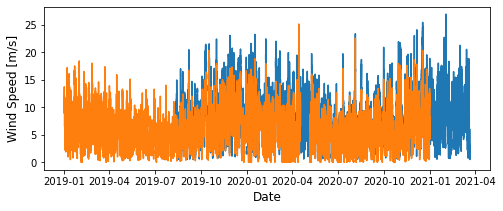

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df_lidar.index, df_lidar['wspd18m'])
ax.plot(df_buoy.index, df_buoy['WSPD'])

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.show()

We should now have one plot with both measured wind speeds. However, we don't have any labels so it's hard to tell which record is which. Let's go ahead and label them and then add a legend. To do so, complete the following steps in the code block below:
<font color='blue'>
1. In line 3, before the `)`, type `, label='Lidar'`.
2. In line 4, before the `)`, type `, label='Buoy'`.
3. In line 9, type `plt.legend()`.
</font>

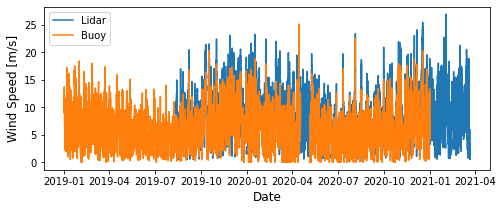

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df_lidar.index, df_lidar['wspd18m'], label='Lidar')
ax.plot(df_buoy.index, df_buoy['WSPD'], label='Buoy')

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.legend()

plt.show()

Now we can see which plot is which! You might notice now that the records do not cover the same time periods. To make it easier to compare the two records, let's select the overlapping time period. It looks like the lidar record begins after the buoy record, so let's find the start date of the lidar.

<font color='blue'>Print the first 5 lines of the lidar dataframe using `.head()`.</font>

In [30]:
df_lidar.head(5)

,wspd18m,wspd38m,wspd58m,wspd78m,wspd98m,wspd118m,wspd138m,wspd158m,wspd178m,wspd198m
timestamp,,,,,,,,,,
2019-08-12 00:00:00,7.2923,7.6785,7.6968,7.8280,7.8013,7.8933,7.8635,7.8858,7.9044,NaN
2019-08-12 00:10:00,7.8613,8.0330,8.0225,7.9279,7.9980,7.9306,8.1698,8.1405,8.0702,8.0487
2019-08-12 00:20:00,7.7594,7.9883,8.0180,8.1314,8.0906,8.1408,8.1291,8.0939,8.2030,8.1353
2019-08-12 00:30:00,7.4891,7.7554,7.7973,7.9551,7.9063,7.9964,7.9652,8.0749,8.0105,8.0792
2019-08-12 00:40:00,7.8829,8.0248,8.1332,8.1741,7.9927,8.1230,8.0443,8.1074,8.1969,8.1296


The first timestamp shows us that the first measurement was on 12 August 2019 at midnight. Therefore, we'll want to trim the buoy dataframe to start at that same date. 

<font color='blue'>Type out and run the following line to ignore all buoy data before 12 August 2019: `df_buoy = df_buoy.loc['2019-8-12':]`</font>

In [31]:
df_buoy = df_buoy.loc['2019-8-12':]

Now the start dates should be the same, but the end dates are different. The buoy dataset ends before the lidar, so let's find the last date of the buoy measurements.

<font color='blue'>Print the last 5 lines of the buoy dataframe using `.tail()`.</font>

In [32]:
df_buoy.tail()

,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
time,,,,,,,,,,,,,
2020-12-31 23:10:00,323.0,7.7,9.8,NaN,NaN,NaN,999.0,1024.0,999.0,9.0,999.0,NaN,NaN
2020-12-31 23:20:00,328.0,8.0,10.1,NaN,NaN,NaN,999.0,1024.2,999.0,9.0,999.0,NaN,NaN
2020-12-31 23:30:00,328.0,8.1,11.0,NaN,NaN,NaN,999.0,1024.1,999.0,9.0,999.0,NaN,NaN
2020-12-31 23:40:00,327.0,6.9,9.5,1.48,7.14,5.03,172.0,1024.2,999.0,9.0,999.0,NaN,NaN
2020-12-31 23:50:00,336.0,6.4,8.6,NaN,NaN,NaN,999.0,1024.4,999.0,9.0,999.0,NaN,NaN


The last measurement is on 31 December 2020, so let's trim the lidar dataframe to end on that date. 

<font color='blue'>Use the same method that we used to trim the buoy dataset to now trim the lidar data.</font>

**Hint:** When we trimmed the buoy data, we wanted all of the data *after* a certain date so we used the format `['date':]`. If we want all of the data *before* a certain date, we should use the format `[:'date']`.

In [33]:
df_lidar = df_lidar.loc[:'2020-12-31']

Now that the datasets are the same lengths, let's plot them again and see how they look.

<font color='blue'>Copy and paste the block of code that we used to plot both wind speeds below.</font>

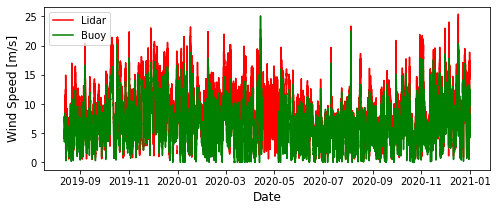

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(8,3))

ax.plot(df_lidar.index, df_lidar['wspd18m'], label='Lidar', color='red')
ax.plot(df_buoy.index, df_buoy['WSPD'], label='Buoy', color='green')

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.legend()

plt.show()

## 4. Compare the two datasets

So far we've been processing the two datasets, preparing them for plotting, and getting ready to compare them. Now let's actually compare the two using some basic statistics. There are an infinite number of statistical measures we could use to compare the records. For now, we'll stick to just a few, but you're more than welcome to use any other methods you're familiar with.

Let's start by looking at the averages of lidar versus the buoy wind speed. In the code below, line 1 calculates the average of the lidar wind speeds at 18 m.

In [38]:
df_lidar['wspd18m'].mean()

8.244364685512513

<font color='blue'>Use the same method to find the average of the buoy data.</font>

In [40]:
df_buoy['WSPD'].mean()

6.471401420426129

The meThis morning, we smoothed the data by averaging winds every week. Let's try that again so we can more easily view the data.

<font color='blue'>For both datasets, find the weekly averages using `.resample()` and `.mean()` like we did this morning. Name the weekly averages `weekly_lidar` and `weekly_buoy`.</font>

In [41]:
weekly_lidar = df_lidar.resample("W").mean()

In [42]:
weekly_buoy = df_buoy.resample("W").mean()

<font color='blue'>Now plot the weekly averages for both the lidar and the buoy data on the same plot.</font>

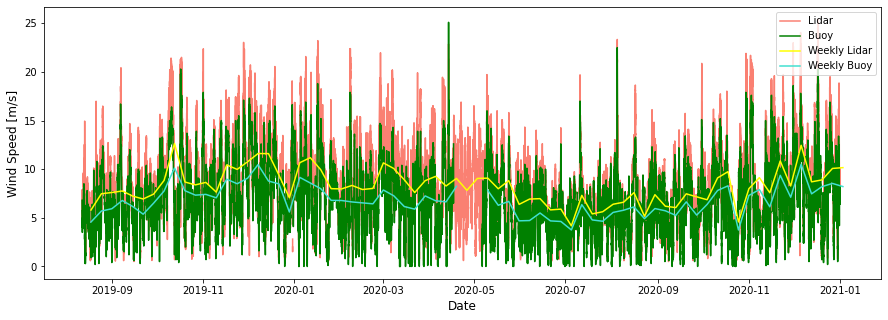

In [51]:
fig, ax = plt.subplots(1, 1, figsize=(15,5))

ax.plot(df_lidar.index, df_lidar['wspd18m'], label='Lidar', color='salmon')
ax.plot(df_buoy.index, df_buoy['WSPD'], label='Buoy', color='green')
ax.plot(weekly_lidar.index, weekly_lidar['wspd18m'], label = 'Weekly Lidar', color='yellow')
ax.plot(weekly_buoy.index, weekly_buoy['WSPD'], label = 'Weekly Buoy', color = 'turquoise')

ax.set_ylabel("Wind Speed [m/s]", fontsize=12)
ax.set_xlabel("Date", fontsize=12)

plt.legend(loc='upper right')

plt.show()

It looks like the lidar wind speeds are consistently higher than the buoy wind speeds. Perhaps that's because the lidar measurements are taken at a slightly higher altitude where wind speeds are generally higher. We could also compare the weekly averages by making a scatter plot and fitting a line to the data.

<font color='blue'>In line 3 below, make a scatter plot of the weekly lidar averages versus the weekly buoy averages.</font>

**Hint:** Most of the code is completed for you already, so you'll just need to fill in the parentheses in line 3. First type out the lidar wind speed column you want to use (`weekly_lidar['wspd18m']`). Type a comma after that and then type out the buoy wind speed column (`weekly_buoy['WSPD']`).

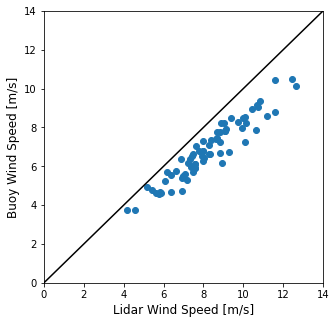

In [52]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.scatter(weekly_lidar['wspd18m'], weekly_buoy['WSPD'])

ax.plot([0,14],[0,14],'k')

ax.set_xlim(0,14)
ax.set_ylim(0,14)

ax.set_xlabel('Lidar Wind Speed [m/s]', fontsize=12)
ax.set_ylabel('Buoy Wind Speed [m/s]', fontsize=12)

plt.show()

You'll notice that there is a black line already plotted on the graph. This is a one-to-one line, which is just like plotting `y = x`. If the data fall on the one-to-one line, they they are very well correlated. In our case, they are all below that line, which means that the lidar wind speeds are greater than the buoy wind speeds. This is exactly what we saw before when we plotted them as functions of time. Let's now quantify the relationship we're seeing in the graph.

We're going to use `numpy` for some of these calculations, so let's turn the two weekly averages into arrays, which will be easier to deal with.

<font color='blue'>Run the following code to create the arrays.</font>

In [53]:
x = np.array(weekly_lidar['wspd18m'])
y = np.array(weekly_buoy['WSPD'])

Now, we want to use `np.polyfit` to fit a line to the data. This returns two values, `m` and `b`, which are the slope and intercept of a line, just like in the format: `y = mx + b`. Remember that we had a bunch of NaN's in the buoy dataset, so line 1 in the code block below ignores all infinite or NaN values.

<font color='blue'>Run the following code to fit a polynomial to the data.</font>

In [54]:
idx = np.isfinite(x) & np.isfinite(y)
m, b = np.polyfit(x[idx], y[idx], 1)

Now let's plot!

<font color='blue'>In line 7, fill in the parentheses to plot the new line. You'll want to plot it as `x, (m*x)+b`.</font>

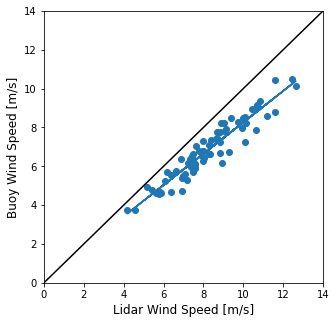

In [55]:
fig, ax = plt.subplots(1, 1, figsize=(5,5))

ax.scatter(weekly_lidar['wspd18m'], weekly_buoy['WSPD'])

ax.plot([0,14],[0,14],'k')

ax.plot(x, (m*x)+b)

ax.set_xlim(0,14)
ax.set_ylim(0,14)

ax.set_xlabel('Lidar Wind Speed [m/s]', fontsize=12)
ax.set_ylabel('Buoy Wind Speed [m/s]', fontsize=12)

plt.show()

This was a simple way to show that the data are not perfectly correlated because the one-to-one line and the line of best fit that we just plotted are different. There are more statistically rigorous ways of showing this, such as performing a linear regression. As an extra challenge, try to perform a linear regression and find the r$^2$ value.